<!-- 

this does make links when rendered to html, 
but when you click on one it opens in another tab in a distorted view...

## Contents

1. [Imports](#Imports)
1. [Get Data](#GetData)
1. [Visualize Data](#VisualizeData)
1. [Feature Scaling](#FeatureScaling)
1. [K-Means Clustering](#KMeansClustering)
1. [Principal Components Analysis (PCA)](#PCA)
1. [Gaussian Mixture Model (GMM)](#GMM)
1. [Comparing K-Means and GMM](#Comparing)
1. [Conclusion](#Conclusion)
-->

In [1]:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\mosta\Downloads\iris_dataset.csv")
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,target
34,4.9,3.1,1.5,0.1,Iris-setosa
80,5.5,2.4,3.8,1.1,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa


In [3]:

X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

     sepal_length  sepal_width  petal_length  petal_width
51            6.4          3.2           4.5          1.5
139           6.9          3.1           5.4          2.1
80            5.5          2.4           3.8          1.1
81            5.5          2.4           3.7          1.0
111           6.4          2.7           5.3          1.9
148    Iris-virginica
119    Iris-virginica
145    Iris-virginica
25        Iris-setosa
27        Iris-setosa
Name: target, dtype: object


In [4]:

data["target"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

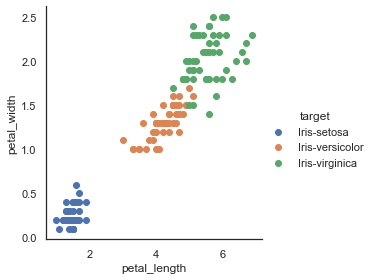

In [5]:

sns.FacetGrid(data, hue="target", size=4) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend();

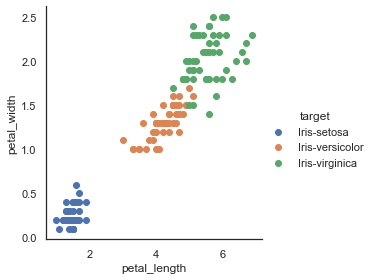

In [6]:

sns.FacetGrid(data, hue="target", size=4) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend();

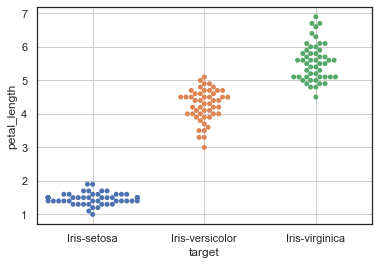

In [7]:

sns.swarmplot(x="target", y="petal_length", data=data)
plt.grid()

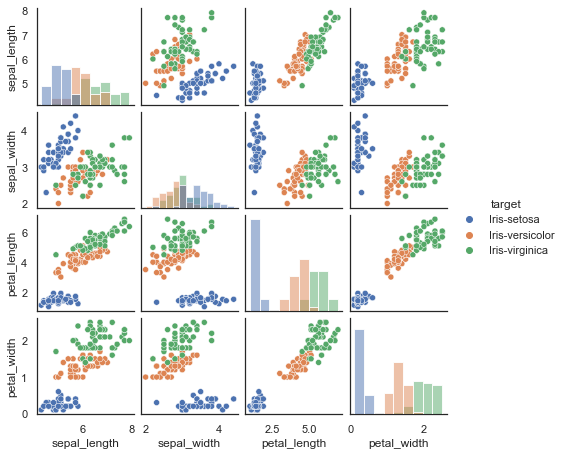

In [8]:
sns.pairplot(data, hue="target", diag_kind="hist", size=1.6);

In [9]:


from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
134,0.310998,-1.050569,1.047087,0.264699
43,-1.021849,1.032057,-1.227541,-0.787085
105,2.128516,-0.124958,1.615744,1.185010
5,-0.537178,1.957669,-1.170675,-1.050031
25,-1.021849,-0.124958,-1.227541,-1.312977


In [10]:


from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)


y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [11]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.4589717867018717

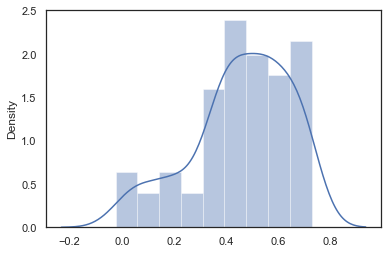

In [12]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

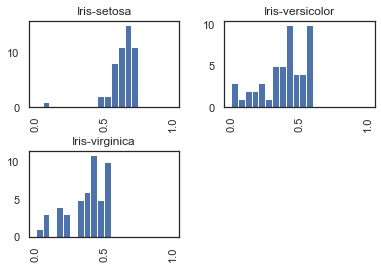

In [13]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['target'] = data['target']
df_scores.hist(by='target', column='SilhouetteScore', range=(0,1.0), bins=20);

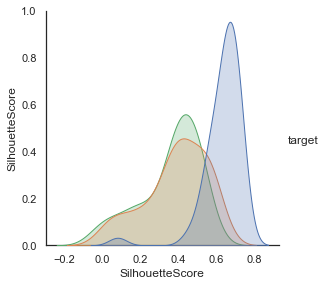

In [14]:
sns.pairplot(df_scores, hue="target", size=4);

In [15]:


from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
65,0.875891,0.509998
113,1.253087,-1.167391
93,-0.373628,-2.017932
67,0.153393,-0.790725
144,2.001691,1.048550


In [16]:

y_id_array = pd.Categorical(data['target']).codes



df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['SpeciesId'] = y_id_array 
df_plot.sample(5)

,PC1,PC2,ClusterKmeans,SpeciesId
124,1.704241,1.014148,2,2
90,0.272335,-1.119442,0,1
123,1.329194,-0.486761,0,2
92,0.330005,-0.988901,0,1
115,1.591809,0.677035,2,2


In [17]:

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    

    fig, ax = plt.subplots(figsize = (7,7))

    
    cmap = mpl.cm.get_cmap('prism')

 
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, 
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

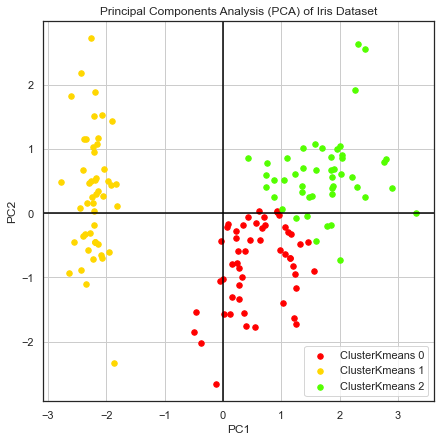

In [18]:

plotData(df_plot, 'ClusterKmeans')

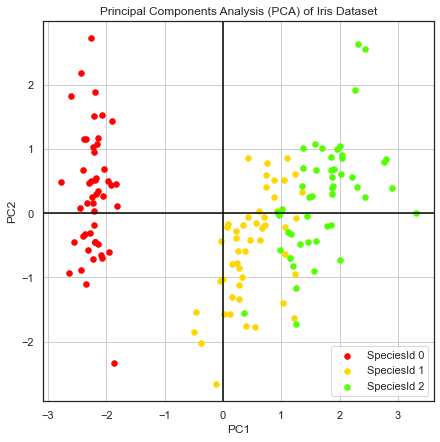

In [19]:

plotData(df_plot, 'SpeciesId')

In [20]:


from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)


y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

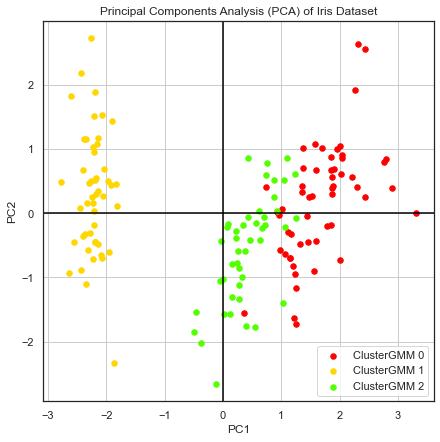

In [21]:

df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

In [22]:


from sklearn.metrics.cluster import adjusted_rand_score


score = adjusted_rand_score(y, y_cluster_kmeans)
score

0.6201351808870379

In [23]:

score = adjusted_rand_score(y, y_cluster_gmm)
score

0.9038742317748124